## Step 1 - Exploring the dataset

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, ops
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print(tf.version.VERSION)
data = pd.read_csv("./IMDB Dataset.csv")
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

2.17.1


In [ ]:
positive = 0
for k in range(len(data)):
    if data["sentiment"][k] == 1:
        positive+=1

print("positive : ",positive," negative : ", 50000-positive)


positive :  25000  negative :  25000


## Step 2 - Tokenization and padding

In [ ]:
# data = data[:100]

# Tokenization using TensorFlow
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])

#Padding

padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post')
max_length = len(padded_sequences[8])


## Step 3 - Evaluation Process of the Model

Compare the returned results with the expected results, calculate loss functions, accuracy, precision, recall, etc, and return the most common words when it fails.

The good way to find the best model would be to only touch at one parameter at once and observe the evolution. During the practical, we did our configurations pretty randomly. Because of short timing, we didn't take the time to make them better later.


## Step 4 - Neural Network

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, data["sentiment"], test_size=0.2, random_state=42)

print(len(x_test),len(y_test))

10000 10000


In [ ]:
def fit(layerDensity_1,layerDensity_2,epochs_count):
  model = models.Sequential([
    layers.Embedding(input_dim=max_length, output_dim=64),  # Example input_dim & output_dim
    layers.GlobalAveragePooling1D(),
    layers.Dense(layerDensity_1, activation='relu'),
    layers.Dense(layerDensity_2, activation='sigmoid')
])

  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','precision','recall'])

  return model.fit(x_train, y_train, epochs=epochs_count, validation_data=(x_test, y_test))

In [ ]:
fit_model = fit(16,1,5)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4989 - loss: 0.6936 - precision: 0.4909 - recall: 0.3584 - val_accuracy: 0.4961 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5047 - loss: 0.6931 - precision: 0.4861 - recall: 0.0724 - val_accuracy: 0.5039 - val_loss: 0.6931 - val_precision: 0.5039 - val_recall: 1.0000
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5008 - loss: 0.6934 - precision: 0.4950 - recall: 0.3930 - val_accuracy: 0.5039 - val_loss: 0.6931 - val_precision: 0.5039 - val_recall: 1.0000
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4968 - loss: 0.6933 - precision: 0.4966 - recall: 0.7495 - val_accuracy: 0.4961 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4972 - loss: 0.6931 - precision: 0.4927 - recall: 0.5071 - val_accuracy:

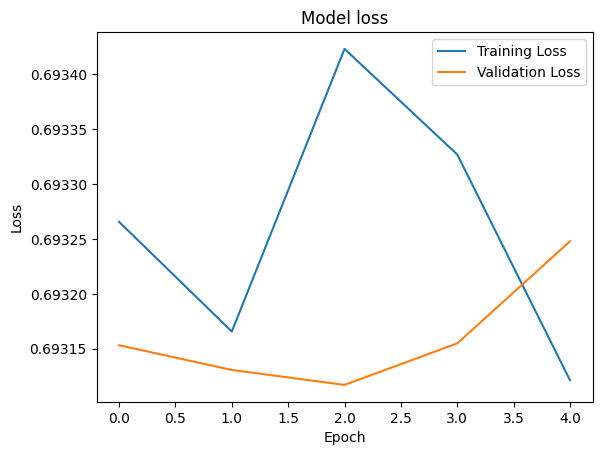

In [ ]:
def plot(fit_model_val):
  plt.plot(fit_model_val.history['loss'], label='Training Loss')
  plt.plot(fit_model_val.history['val_loss'], label='Validation Loss')
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loc='upper right')
  plt.show()
plot(fit_model)

As we can see, the first model is pretty bad, as the loss stays around 0.6 for both.

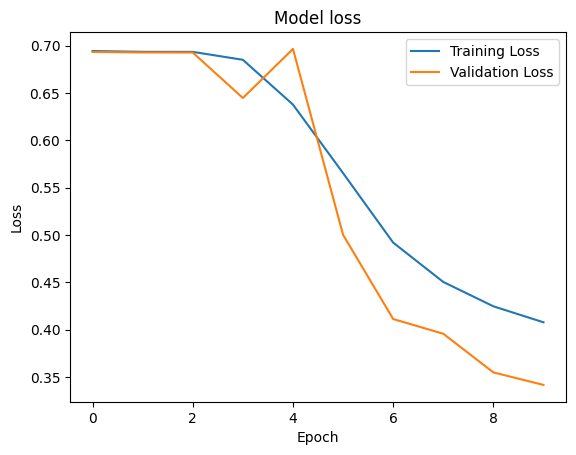

In [ ]:
fit_model_2 = fit(4092,1,10)
plot(fit_model_2)

Here, the situation is way better as we have losses that go down for both.

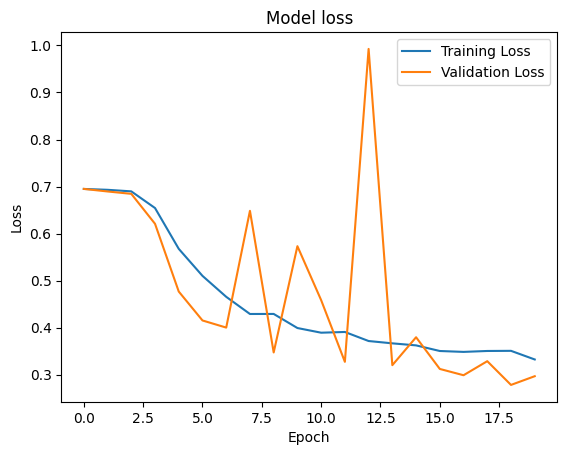

In [ ]:
fit_model_3 = fit(256,1,20)
plot(fit_model_3)

This one is pretty weird, as the validation loss does spikes like that. The training loss is decent.

In [ ]:
model = models.Sequential([
    layers.Embedding(input_dim=max_length, output_dim=64),  # Example input_dim & output_dim
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','precision','recall'])

fit_model_4 = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5002 - loss: 0.6935 - precision: 0.4973 - recall: 0.3778 - val_accuracy: 0.5039 - val_loss: 0.6931 - val_precision: 0.5039 - val_recall: 1.0000
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5018 - loss: 0.6932 - precision: 0.5018 - recall: 0.8786 - val_accuracy: 0.4961 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4986 - loss: 0.6932 - precision: 0.3548 - recall: 0.2839 - val_accuracy: 0.4961 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4995 - loss: 0.6932 - precision: 0.2744 - recall: 0.1079 - val_accuracy: 0.4961 - val_loss: 0.6935 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4950 - loss: 0.6933 - precision: 0.4721 - recall: 0.4009 - 

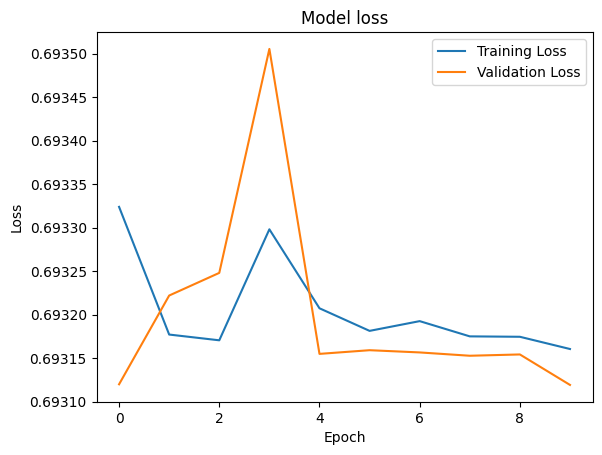

In [ ]:
plot(fit_model_4)

We tried here to change the layers, and the model went back to no evolution.

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4976 - loss: 0.6956 - precision: 0.4944 - recall: 0.4604 - val_accuracy: 0.4961 - val_loss: 0.6933 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5043 - loss: 0.6934 - precision: 0.4951 - recall: 0.4141 - val_accuracy: 0.4961 - val_loss: 0.6938 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5149 - loss: 0.6928 - precision: 0.5194 - recall: 0.3178 - val_accuracy: 0.5322 - val_loss: 0.6900 - val_precision: 0.6571 - val_recall: 0.1498
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5325 - loss: 0.6895 - precision: 0.5319 - recall: 0.4535 - val_accuracy: 0.6274 - val_loss: 0.6596 - val_precision: 0.6936 - val_recall: 0.4668
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5977 - loss: 0.6640 - precision: 0.6034 - recall: 0.5890 - val_acc

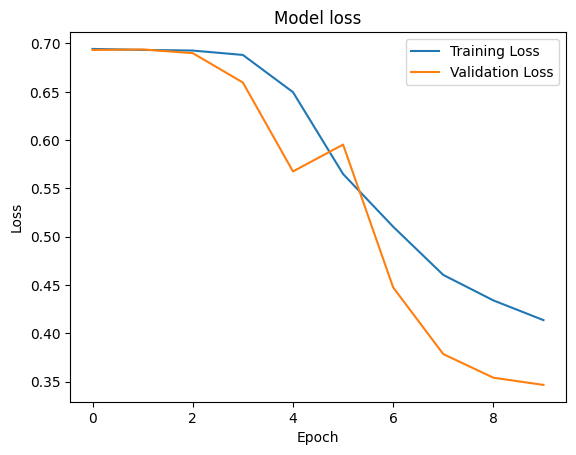

In [ ]:
model = models.Sequential([
    layers.Embedding(input_dim=max_length, output_dim=64),  # Example input_dim & output_dim
    layers.GlobalAveragePooling1D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation='sigmoid'),

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','precision','recall'])

fit_model_5 = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
plot(fit_model_5)

Trying other layers again, this time the model evoluates and reach 0.35 of loss in validation.

# Exercice 2 : Recurrent Neural Network

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 77ms/step - accuracy: 0.4916 - loss: 0.6932 - precision: 0.4918 - recall: 0.5930 - val_accuracy: 0.4961 - val_loss: 0.6931 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 97s 78ms/step - accuracy: 0.4967 - loss: 0.6932 - precision: 0.4794 - recall: 0.1591 - val_accuracy: 0.5039 - val_loss: 0.6931 - val_precision: 0.5039 - val_recall: 1.0000
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.4926 - loss: 0.6932 - precision: 0.4907 - recall: 0.5188 - val_accuracy: 0.4961 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.5038 - loss: 0.6931 - precision: 0.4526 - recall: 0.0751 - val_accuracy: 0.5039 - val_loss: 0.6931 - val_precision: 0.5039 - val_recall: 1.0000
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 77ms/step - accuracy: 0.4939 - loss: 0.6932 - precision: 0.4896 - recall: 0.4872 - v

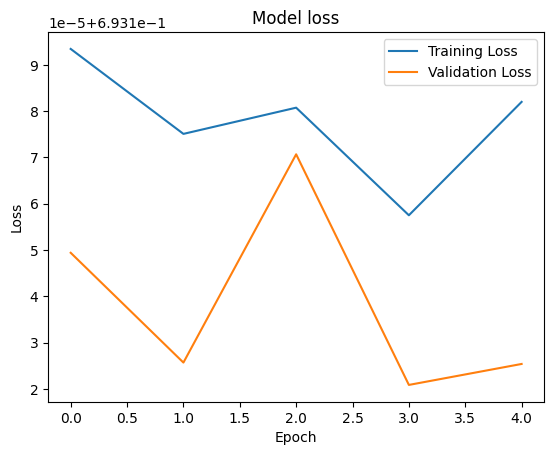

In [ ]:

model = models.Sequential([
    layers.Embedding(input_dim=max_length, output_dim=64),
    layers.LSTM(8),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','precision','recall'])

fit_model_rnn_1 = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
plot(fit_model_rnn_1)

The loss is very big for the original model, meaning that the parameters have to be changed.

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 101s 79ms/step - accuracy: 0.4990 - loss: 0.6937 - precision: 0.5000 - recall: 0.5324 - val_accuracy: 0.5039 - val_loss: 0.6931 - val_precision: 0.5039 - val_recall: 1.0000
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 79ms/step - accuracy: 0.4933 - loss: 0.6932 - precision: 0.4930 - recall: 0.5320 - val_accuracy: 0.4961 - val_loss: 0.6933 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 80ms/step - accuracy: 0.5017 - loss: 0.6932 - precision: 0.3770 - recall: 0.2291 - val_accuracy: 0.4961 - val_loss: 0.6933 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 79ms/step - accuracy: 0.5033 - loss: 0.6932 - precision: 0.5040 - recall: 0.2105 - val_accuracy: 0.5039 - val_loss: 0.6931 - val_precision: 0.5039 - val_recall: 1.0000
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 151s 86ms/step - accuracy: 0.5031 - loss: 0.6932 - precision: 0.5033 - recall: 0.7082 -

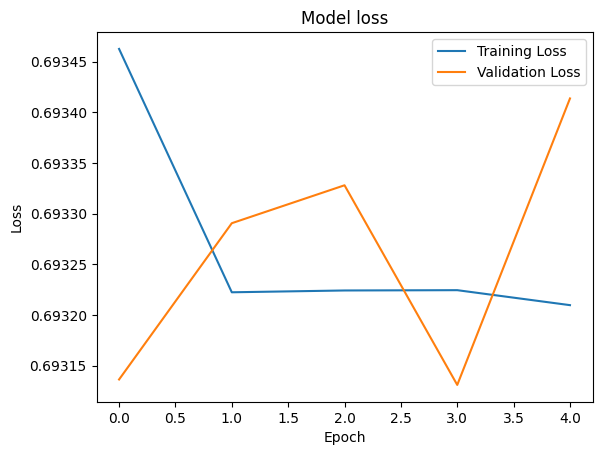

In [ ]:

model = models.Sequential([
    layers.Embedding(input_dim=max_length, output_dim=64),
    layers.LSTM(8),
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='tanh'),
    layers.Dense(1, activation='sigmoid'),

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','precision','recall'])

fit_model_rnn_1 = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
plot(fit_model_rnn_1)

We tried to add a tanh layer, but it made the model become stable at 0.6 loss with no evolution.

# Exercice 3 : Transformer Architecture

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = ops.shape(x)[-1]
        positions = ops.arange(start=0, stop=maxlen, step=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 130s 95ms/step - accuracy: 0.5020 - loss: 0.6975 - precision: 0.4790 - recall: 0.3766 - val_accuracy: 0.4961 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 122s 85ms/step - accuracy: 0.4987 - loss: 0.6932 - precision: 0.3664 - recall: 0.0424 - val_accuracy: 0.4961 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 85ms/step - accuracy: 0.4968 - loss: 0.6932 - precision: 0.4300 - recall: 0.3450 - val_accuracy: 0.4961 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 84ms/step - accuracy: 0.4989 - loss: 0.6932 - precision: 0.4848 - recall: 0.6225 - val_accuracy: 0.4961 - val_loss: 0.6933 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 85ms/step - accuracy: 0.5037 - loss: 0.6931 - precision: 0.1908 - 

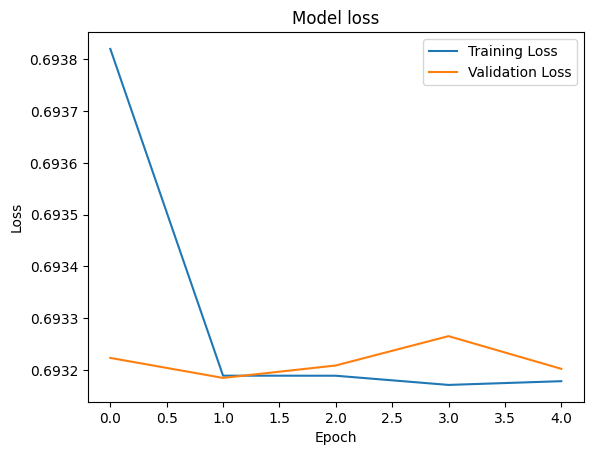

In [ ]:

model = models.Sequential([
    TokenAndPositionEmbedding(max_length, 10000, 32),
    TransformerBlock(32, 1, 16),
    layers.GlobalAveragePooling1D(),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','precision','recall'])

fit_model_rnn_1 = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
plot(fit_model_rnn_1)

The initial configuration is pretty bad, as the loss is constant around 0.69.